In [33]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
from mnist_load import *

import time

In [34]:
from scipy.stats import mode
from kkmeans import KKernelClustering, k_gaussian, k_tanh, kernel_mat
from sclustering import SpectralClustering
#from sklearn.cluster import SpectralClustering
from graph import construct_graph

# Clustering All 10 Digits

In [35]:
Xt = Xt.astype(np.float)
Xv = Xv.astype(np.float)

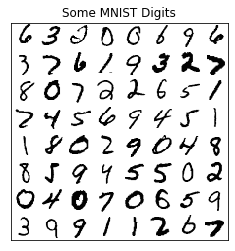

In [37]:
n_col = 8
fig, ax = plt.subplots()
view_digits(ax, Xt[:(n_col*n_col)], n_col, n_col)
ax.set_title("Some MNIST Digits")
plt.savefig("img/some_mnist_digits.pdf", format="pdf")

In [5]:
def clusters_to_labels(labels, clusters):
    cluster_labels = np.zeros(clusters.shape, np.int)
    labels_unique = list(set(labels))
    for la in labels_unique:
        mask = labels == la
        assign = mode(clusters[mask]).mode
        cluster_labels[clusters == assign] = la
    return cluster_labels
        
def mrisk(Y, Yp):
    N = Y.size
    D = Y- Yp
    D[D != 0] = 1
    return D.sum()/N

In [6]:
X_max = np.abs(Xt).max(axis=0)
X = Xt/255

In [7]:
k=10

In [8]:
kc_linear = KKernelClustering(k, 100, np.dot)
labels_linear = kc_linear.train(X)
print(kc_linear._wss)

23343.220173478105


In [29]:
kc_gaussian = KKernelClustering(k, 100, lambda x,y: k_gaussian(x, y, 100))
labels_gaussian = kc_gaussian.train(X)


In [30]:
#K = kernel_mat(lambda x,y: k_gaussian(x,y,100), X)
#kc_spec = SpectralClustering(n_clusters=10, assign_labels='discretize', random_state=0, affinity="precomputed")
#labels_spec = kc_spec.fit_predict(K)
kc_spec = SpectralClustering(10, 100, k_gaussian(x,y,100))
labels_spec = kc_spec.train(X)

In [ ]:
kc_knn = SpectralClustering(n_clusters=10, random_state=0)
labels_knn = kc_knn.fit_predict(X)

In [31]:
labels_gaussian = clusters_to_labels(Yt, labels_gaussian)
labels_linear = clusters_to_labels(Yt, labels_linear)
labels_spec = clusters_to_labels(Yt, labels_spec)
#labels_knn = clusters_to_labels(Yt, labels_knn)

In [32]:
print("Gaussian Kernel Risk: ", mrisk(Yt, labels_gaussian))
print("Linear Kernel Risk: ", mrisk(Yt, labels_linear))
print("Spectral Clustering Risk: ", mrisk(Yt, labels_spec))
#print("KNN Risk: ", mrisk(Yt, labels_spec))

Gaussian Kernel Risk:  0.585
Linear Kernel Risk:  0.5733333333333334
Spectral Clustering Risk:  0.49666666666666665


## Clustering 2 Digits

In [28]:
d0 = 7
d1 = 1
Y2t = Yt[(Yt == d0) | (Yt == d1)]
X2t = X[(Yt == d0) | (Yt == d1)]

In [29]:
kc_linear2 = KKernelClustering(2, 100, np.dot)
labels_linear2 = kc_linear2.train(X2t)

In [44]:
kc_gaussian2 = KKernelClustering(2, 100, lambda x,y: k_gaussian(x, y, 5))
labels_gaussian2 = kc_gaussian2.train(X2t)

In [47]:
K = kernel_mat(lambda x,y: k_gaussian(x,y,5), X2t)
kc_spec2 = SpectralClustering(n_clusters=2, assign_labels='discretize', random_state=0, affinity="precomputed")
labels_spec2 = kc_spec2.fit_predict(K)

In [25]:
#kc_knn2 = SpectralClustering(n_clusters=2, random_state=0)
#labels_knn2 = kc_knn2.fit_predict(X2t)
kc_spec = SpectralClustering(2, 100, k_gaussian(x,y,100))
labels_spec = kc_spec.train(X)

In [48]:
labels_gaussian2 = clusters_to_labels(Y2t, labels_gaussian2)
labels_linear2 = clusters_to_labels(Y2t, labels_linear2)
labels_spec2 = clusters_to_labels(Y2t, labels_spec2)
#labels_knn2 = clusters_to_labels(Y2t, labels_knn2)

In [49]:
print("Gaussian Kernel Risk: ", mrisk(Y2t, labels_gaussian2))
print("Linear Kernel Risk: ", mrisk(Y2t, labels_linear2))
print("Spectral Clustering Risk: ", mrisk(Y2t, labels_spec2))
#print("KNN Risk: ", mrisk(Y2t, labels_spec2))

Gaussian Kernel Risk:  0.023238380809595203
Linear Kernel Risk:  0.037481259370314844
Spectral Clustering Risk:  0.03823088455772114


In [20]:
Y2t

array([9, 9, 1, ..., 1, 9, 1], dtype=uint8)

In [21]:
labels_linear

array([7, 5, 7, ..., 0, 0, 0])